In [1]:
import pandas as pd

file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\churn.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.info())


   Call Failure  Complaints  Subscription Length  Charge Amount  \
0             8           0                   38              0   
1             0           0                   39              0   
2            10           0                   37              0   
3            10           0                   38              0   
4             3           0                   38              0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1   

In [2]:
import pandas as pd

file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\churn.csv'
data = pd.read_csv(file_path)

print(data.columns)


Index(['Call Failure', 'Complaints', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\churn.csv'
data = pd.read_csv(file_path)
# missing values
data.fillna(data.median(), inplace=True)

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop(columns='Churn') 
y = data['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize 
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9380952380952381
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       520
           1       0.84      0.79      0.82       110

    accuracy                           0.94       630
   macro avg       0.90      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630



In [5]:
import joblib

model_filename = 'rf_churn_model.pkl'
joblib.dump(model, model_filename)



['rf_churn_model.pkl']

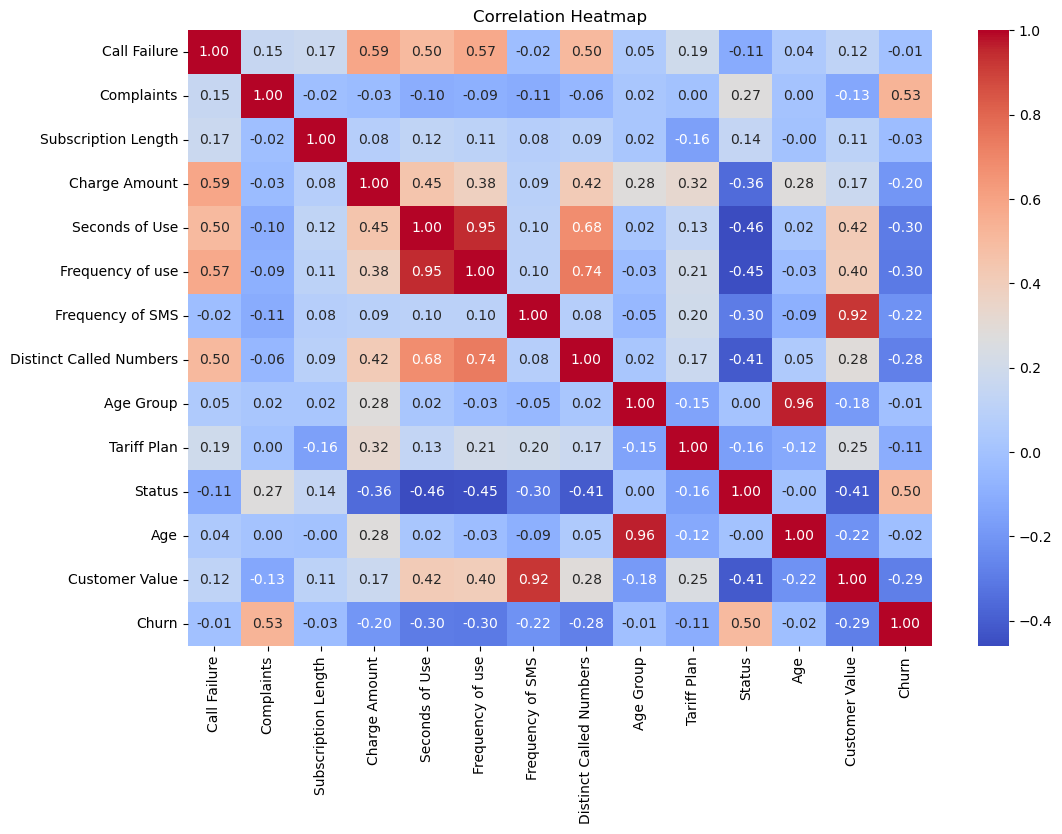

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


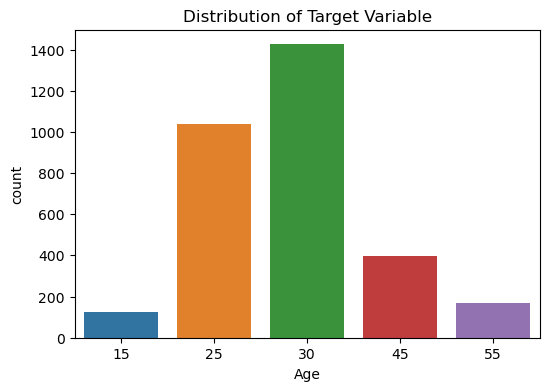

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Age', data=data)
plt.title('Distribution of Target Variable')
plt.show()


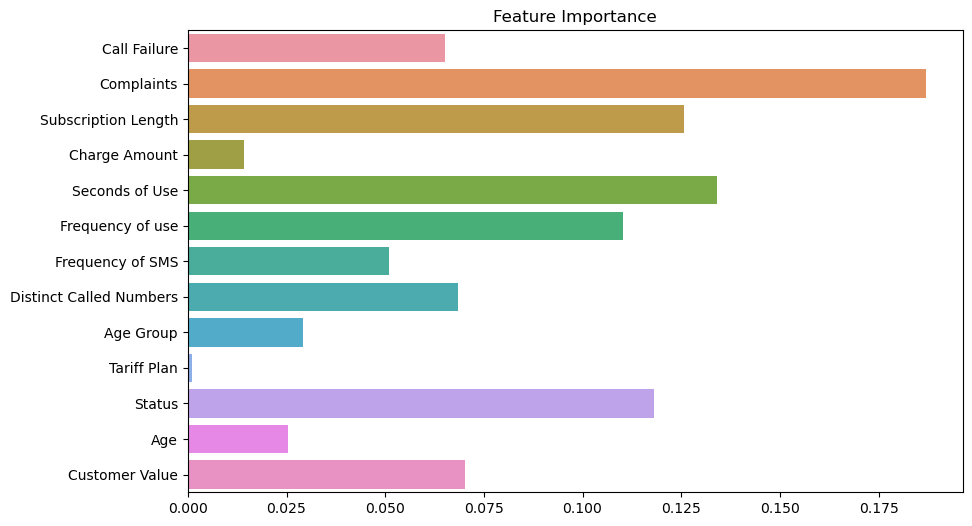

In [8]:
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()


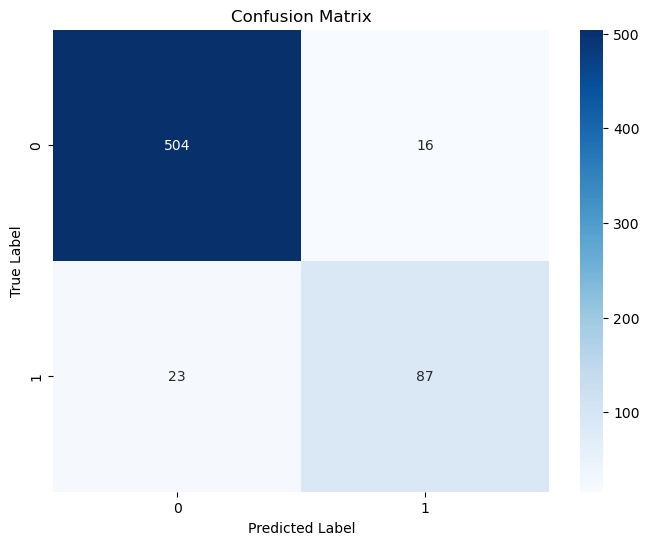

In [9]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
